<h2>1.Derive an analytical solution to the regression problem.</h2>  
$ y = w_1x_1 + ... w_nx_n + w_0$  
regression problem is find a mapping function f from X to Y.  <br>
$$f : X -> y | y \in R, X \in R^D$$  <br>
and i want to model the dependency between y and x like  <br>
 $$y = f(x)$$  
$$ y = w_1x_1 + ... w_nx_n + w_0$$ 
$$ f(x) = <w_i, x_i> + w_0 $$  
where $w$ - is slope   
$w_0$ - bais   
X - input vector <br>
i made convert   <br>
$$
(x_{i1} \; \ldots \; x_{iD}) \cdot
\begin{pmatrix}
w_1 \\ \vdots \\ w_D
\end{pmatrix}
+ w_0 =
(1 \; x_{i1} \; \ldots \; x_{iD}) \cdot
\begin{pmatrix}
w_0 \\ w_1 \\ \vdots \\ w_D
\end{pmatrix}
$$  <br>
$ f_w (x_i) = <w, x_i>$ <br>
Let us take the Euclidean distance between the target vector and the model response vector as the loss function - L2.

$$
L(f, X, y) = \| y - f(X) \|_2^2 =
$$

$$
= \| y - Xw \|_2^2 = \sum_{i=1}^{N} \left( y_i - \langle w, x_i \rangle \right)^2
$$
and convert it to MSE - mean Squared Error
$$
MSE(f, X, y) = 1/N\ || y - Xw \||_2^2 = 1/N \sum_{i=1}^{N} \left( y_i - \langle w, x_i \rangle \right)^2
$$

and the optimization task is
$$
|| y - Xw \||_2^2 -> min
$$

Analytical solution can be obtained by projecting the target vector onto the subspace spanned by the features. Let the columns of the feature matrix $(X)$ be denoted as $( x^{(1)}, \dots, x^{(D)})$. Then the regression problem can be formulated as follows:

> Find a linear combination of the columns $( x^{(1)}, \dots, x^{(D)})$ that best approximates the target vector $( y )$ in the Euclidean norm sense.

This means we are looking for weights \( w \) such that the predicted values
$$
Xw = w_1 x^{(1)} + \dots + w_D x^{(D)}
$$
are as close as possible to the vector \( y \). In other words, we want to find the projection $( y_{\parallel} = Xw )$ onto the subspace spanned by the features so that the orthogonal component
$$
y_{\perp} = y - Xw
$$
is perpendicular to each feature vector:
$$
y_{\perp} \perp x^{(1)}, \dots, x^{(D)}.
$$

This orthogonality condition can be expressed in matrix form as
$$
X^T (y - Xw) = 0,
$$
where each equation corresponds to the condition that the residuals are orthogonal to a feature. <br>


These equations are known as the **normal equations** for the least squares problem. By solving them, we obtain the analytical formula for the optimal weights:
$$
w = (X^T X)^{-1} X^T y,
$$
which is known as the **normal equation formula** or the analytical solution for linear regression.

or

$$
error = \sum (y - X W)^2 = (y - X W)^T (y - X W) = y^T y - y^T X W - (X W)^T y + (X W)^T (X W) = 0
$$

$$
2 y^T X + 2 X^T X W = 0
$$
$$
(X^T X) W = y^T X
$$
$$
W = (X^T X)^{-1} y^T X
$$

> **Note.**  
> - For the solution to exist, the matrix $( X^T X)$ must be non-singular (invertible), which requires the columns of $( X )$ to be linearly independent.
> - The analytical solution is practical for small problems, but for large datasets, it is better to use numerical optimization methods (e.g., stochastic gradient descent), since computing the inverse $((X^T X)^{-1})$ becomes expensive.


<h2>2. What changes in the solution when L1 and L2 regularizations are added to the loss function?</h2>

 The idea of this addition is that the models do not try to learn complex patterns and try to find the solution. In other words, if the model starts to overfit in the process of finding a solution, then the addition in the in the error function will begin to increase, forcing the model to stop training.

$$
min_w\sum_{i=1}^{N} \left( L( y_i, f( w, x_i) \right)
$$

![loss_without_regularization](https://raw.githubusercontent.com/ardipazij/s21_ML/main/ML-2/images/loss_without_regularization.png)

$$
min_w\sum_{i=1}^{N} \left( L( y_i, f( w, x_i) \right) + \alpha R(w)
$$
![loss_with_regularization](https://raw.githubusercontent.com/ardipazij/s21_ML/main/ML-2/images/loss_with_regularization.png)



<h2>3. Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?</h2>

When using L2 (Ridge), we add the sum of the squared weights:
$$
R(w) = \sum w_i^2
$$
When updating the weight, we subtract its derivative (the derivative of the square is $2w$):
$$
w_{new} = w_{old} - \eta \cdot (\frac{\partial Loss}{\partial w} + \lambda \cdot 2w)
$$
If the weight is large, the penalty will also be large. But as the weight decreases, the penalty decreases as well. It follows that the closer the weight is to zero, the weaker the effect of regularization becomes, which is why complete zeroing does not occur.When using L1 regularization, we add the sum of the absolute values of the weights:
$$
R(w) = \sum |w_i|
$$
The derivative of the absolute value is either $+1$ (if $w > 0$) or $-1$ (if $w < 0$):
$$
w_{new} = w_{old} - \eta \cdot (\frac{\partial Loss}{\partial w} + \lambda \cdot \text{sign}(w))
$$
As the error gradually decreases during optimization, the penalty remains the same. Regularization continues to reduce the weight with the same intense force until it crosses zero. At this point, gradient descent simply stops it at the 0 mark.

The application of L1 regularisation leads to features that do not have a significant impact on the response being given a weight of 0 as a result of optimisation.
This allows features that have a weak influence on the target to be conveniently removed. In addition, it makes it possible to automatically eliminate features that participate in approximate linear relationships, thus avoiding problems associated with multicollinearity (sensitivity to small changes in data).

<h2>4. Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies.</h2>

If we have non-linear features, we can create new features that will depend on the non-linear feature.

![feature_engineering](https://raw.githubusercontent.com/ardipazij/s21_ML/main/ML-2/images/feature_engineering.png)


Then, if we have two variables $( X_1 )$ and $( X_2 )$, we can add a term like $( \sin(x) )$.  
As a result, a two-dimensional nonlinear problem is transformed into a three-dimensional linear regression.

We can add all kinds of different features, and by having more data, we can describe complex relationships in a more convenient way.  
The process of finding such additional features is called **feature engineering**.


In [25]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [8]:
!curl -L https://github.com/ardipazij/s21_ML/raw/main/data/test.json -o test.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  100M  100  100M    0     0  1135k      0  0:01:30  0:01:30 --:--:-- 1233k


In [31]:
import sys
!{sys.executable} -m pip install scikit-learn

  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 876.2 kB/s  0:00:11a 0:00:01m eta 0:00:01
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 596.5 kB/s  0:00:53 eta 0:00:010:00:02
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [9]:
!curl -L https://github.com/ardipazij/s21_ML/raw/main/data/train.json -o train.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 67.2M  100 67.2M    0     0  1212k      0  0:00:56  0:00:56 --:--:-- 1263k


In [10]:
!ls

test.json  train.json  Untitled.ipynb


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.6}'.format)

In [53]:
raw_train_df = pd.read_json("train.json")
raw_test_df = pd.read_json("test.json")

# Make all the preprocessing staff

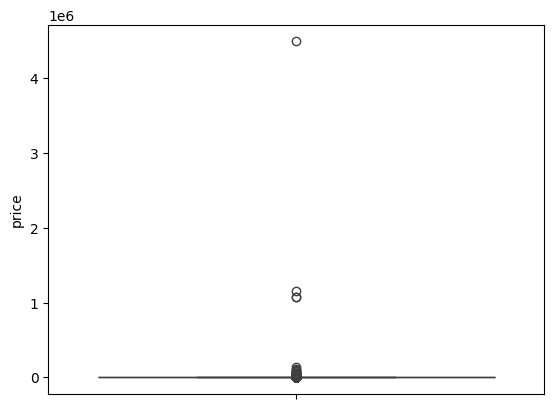

In [54]:
sns.boxplot(raw_train_df['price'])
plt.show()

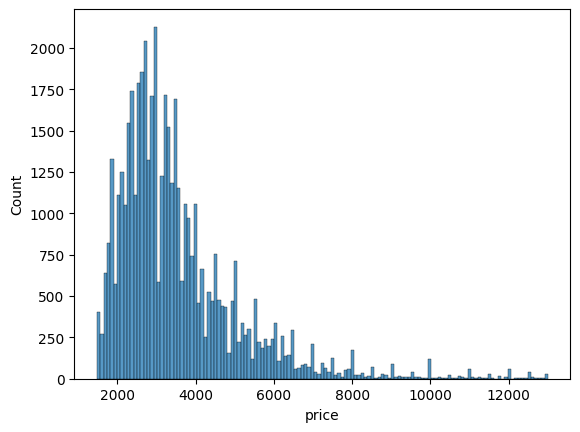

In [55]:
lower_bound = raw_train_df['price'].quantile(0.01)
upper_bound = raw_train_df['price'].quantile(0.99)
raw_train_df = raw_train_df[(raw_train_df['price'] >= lower_bound) & (raw_train_df['price'] <= upper_bound)]

# and making all preprocessing for train also for test
lower_bound = raw_test_df['price'].quantile(0.01)
upper_bound = raw_test_df['price'].quantile(0.99)
raw_test_df = raw_test_df[(raw_test_df['price'] >= lower_bound) & (raw_test_df['price'] <= upper_bound)]
sns.histplot(raw_train_df['price'])
plt.show()

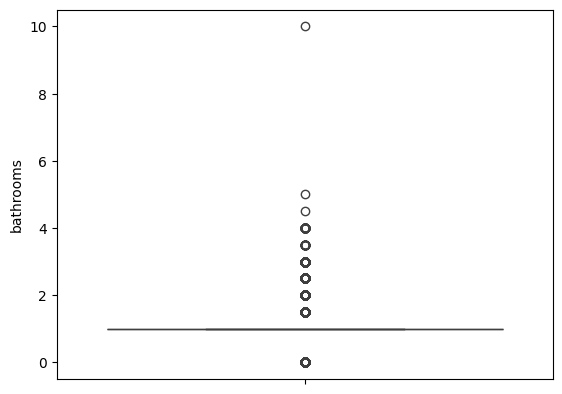

In [56]:
sns.boxplot(raw_train_df['bathrooms'])
plt.show()

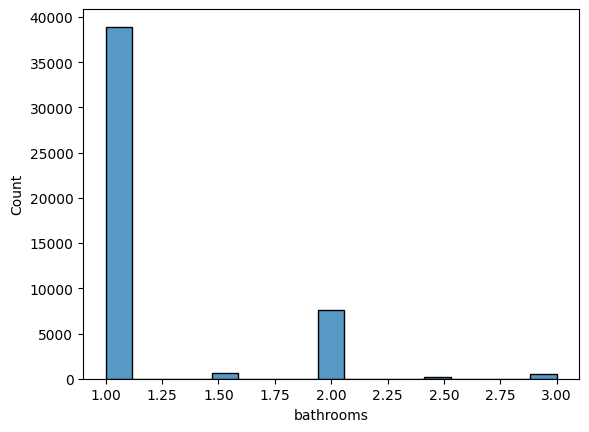

In [57]:
lower_bound = raw_train_df['bathrooms'].quantile(0.01)
upper_bound = raw_train_df['bathrooms'].quantile(0.99)
raw_train_df = raw_train_df[(raw_train_df['bathrooms'] >= lower_bound) & (raw_train_df['bathrooms'] <= upper_bound)]

lower_bound = raw_test_df['bathrooms'].quantile(0.01)
upper_bound = raw_test_df['bathrooms'].quantile(0.99)
raw_test_df = raw_test_df[(raw_test_df['bathrooms'] >= lower_bound) & (raw_test_df['bathrooms'] <= upper_bound)]
sns.histplot(raw_train_df['bathrooms'])
plt.show()

In [58]:
raw_train_df['features']

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
15        [Doorman, Elevator, Fitness Center, Laundry in...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 47957, dtype: object

In [59]:
raw_train_df["features"] = raw_train_df["features"].astype(str)
raw_test_df["features"] = raw_test_df["features"].astype(str)

In [60]:
raw_train_df["features"] = raw_train_df["features"].str.replace(r"[\[\]'\" ]", "", regex=True)
raw_test_df["features"] = raw_test_df["features"].str.replace(r"[\[\]'\" ]", "", regex=True)

In [61]:
raw_train_df['features']

4         DiningRoom,Pre-War,LaundryinBuilding,Dishwashe...
6         Doorman,Elevator,LaundryinBuilding,Dishwasher,...
9         Doorman,Elevator,LaundryinBuilding,LaundryinUn...
10                                                         
15         Doorman,Elevator,FitnessCenter,LaundryinBuilding
                                ...                        
124000                   Elevator,Dishwasher,HardwoodFloors
124002    CommonOutdoorSpace,CatsAllowed,DogsAllowed,NoF...
124004    DiningRoom,Elevator,Pre-War,LaundryinBuilding,...
124008    Pre-War,LaundryinUnit,Dishwasher,NoFee,Outdoor...
124009    DiningRoom,Elevator,LaundryinBuilding,Dishwash...
Name: features, Length: 47957, dtype: object

In [62]:
raw_test_df['features']

0         Elevator,LaundryinBuilding,LaundryinUnit,Dishw...
1                           Pre-War,DogsAllowed,CatsAllowed
2                           Pre-War,DogsAllowed,CatsAllowed
3                    HardwoodFloors,DogsAllowed,CatsAllowed
5         RoofDeck,Doorman,Elevator,FitnessCenter,Pre-Wa...
                                ...                        
124003                                                     
124005    Doorman,Elevator,LaundryinBuilding,Dishwasher,...
124006                              DogsAllowed,CatsAllowed
124007             Doorman,Elevator,CatsAllowed,DogsAllowed
124010    Garden/Patio,LaundryinUnit,Dishwasher,Hardwood...
Name: features, Length: 72614, dtype: object

In [63]:
all_features = []

for _, row in raw_train_df.iterrows():
    if pd.notna(row['features']):
        parts = [f for f in row['features'].split(",") if f != ""]
        all_features.extend(parts)

In [64]:
unique_features = set(all_features)
print(len(unique_features))

1528


In [65]:
from collections import Counter
feature_counts = Counter(all_features)
top_20 = [f for f, _ in feature_counts.most_common(20)]

In [66]:
top_20

['Elevator',
 'HardwoodFloors',
 'CatsAllowed',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

In [67]:
for feature in top_20:
    raw_train_df[feature] = raw_train_df['features'].apply(lambda x: 1 if feature in x else 0)
    raw_test_df[feature] = raw_test_df['features'].apply(lambda x: 1 if feature in x else 0)

In [68]:
raw_train_df = raw_train_df.drop(columns=["building_id", "created", "description", "display_address" ,"features", "manager_id", "photos", "street_address", "latitude","listing_id", "longitude", "interest_level"])

In [69]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47957 entries, 4 to 124009
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          47957 non-null  float64
 1   bedrooms           47957 non-null  int64  
 2   price              47957 non-null  int64  
 3   Elevator           47957 non-null  int64  
 4   HardwoodFloors     47957 non-null  int64  
 5   CatsAllowed        47957 non-null  int64  
 6   DogsAllowed        47957 non-null  int64  
 7   Doorman            47957 non-null  int64  
 8   Dishwasher         47957 non-null  int64  
 9   NoFee              47957 non-null  int64  
 10  LaundryinBuilding  47957 non-null  int64  
 11  FitnessCenter      47957 non-null  int64  
 12  Pre-War            47957 non-null  int64  
 13  LaundryinUnit      47957 non-null  int64  
 14  RoofDeck           47957 non-null  int64  
 15  OutdoorSpace       47957 non-null  int64  
 16  DiningRoom         47957 n

In [70]:
raw_test_df = raw_test_df.drop(columns=["building_id", "created", "description", "display_address" ,"features", "manager_id", "photos", "street_address", "latitude","listing_id", "longitude"])

In [71]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72614 entries, 0 to 124010
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          72614 non-null  float64
 1   bedrooms           72614 non-null  int64  
 2   price              72614 non-null  int64  
 3   Elevator           72614 non-null  int64  
 4   HardwoodFloors     72614 non-null  int64  
 5   CatsAllowed        72614 non-null  int64  
 6   DogsAllowed        72614 non-null  int64  
 7   Doorman            72614 non-null  int64  
 8   Dishwasher         72614 non-null  int64  
 9   NoFee              72614 non-null  int64  
 10  LaundryinBuilding  72614 non-null  int64  
 11  FitnessCenter      72614 non-null  int64  
 12  Pre-War            72614 non-null  int64  
 13  LaundryinUnit      72614 non-null  int64  
 14  RoofDeck           72614 non-null  int64  
 15  OutdoorSpace       72614 non-null  int64  
 16  DiningRoom         72614 n

In [72]:
y_train = raw_train_df['price']
X_train = raw_train_df.drop(columns=['price'])
y_test = raw_test_df['price']
X_test = raw_test_df.drop(columns=['price'])

# 4 Linear regression

In [73]:
class LinearRegressionAnalytical:
    def __init__(self, lmbd: float = 0.0):
        self.w = None
        self.eps = None
        self.lmbd = lmbd
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y):
        X = self.add_intercept(X)
        X = np.asarray(X)
        I = np.eye(X.shape[1])
        I[0, 0] = 0 
        y = np.asarray(y).ravel()
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X) + self.lmbd * I), np.transpose(X)), y)
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)
        
class LinearRegressionGradientDescent:
    def __init__(self):
        self.w = None
        self.epoch = 10000
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y, alpha = 0.01, err = 1e-6):
        time = 0
        X = self.add_intercept(X)
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.w = np.random.randn(X.shape[1])
        self.eps = 1
        for i in range(self.epoch):
            f = np.dot(X, self.w)
            self.eps = f - y
            if np.mean(self.eps**2) < err:
                break
            grad = 2* np.dot(np.transpose(X), self.eps) / len(X)
            
            if np.linalg.norm(grad) > 100:
                current_alpha = alpha * 0.1
            else:
                current_alpha = alpha

            new_w = self.w - current_alpha * grad
            
            if not np.all(np.isfinite(new_w)):
                print(f"Остановка: веса стали бесконечными на итерации {i}")
                break
                
            self.w = new_w
            
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)


class LinearRegressionStochasticGradientDescent:
    def __init__(self):
        self.w = None
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y, alpha = 0.05, batch_size = 100, epochs = 100, flag_determ = False):
        X = self.add_intercept(X)
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.w = np.random.randn(X.shape[1]) if not flag_determ else np.zeros(X.shape[1])
        for epoch in range(epochs):
            ind = np.random.permutation(X.shape[0]) if not flag_determ else np.arange(X.shape[0])
            X_shuffle = X[ind]
            y_shuffle = y[ind]
            for i in range (0, X.shape[0], batch_size):
                X_batch = X_shuffle[i:i + batch_size]
                Y_batch = y_shuffle[i:i + batch_size]
                actual_batch_size = len(X_batch)
                f = np.dot(X_batch, self.w)
                self.eps = f - Y_batch
                grad = 2* np.dot(np.transpose(X_batch), self.eps) / actual_batch_size
                self.w -= alpha * grad
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)

# MAE, RMSE and R2

In [74]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def R2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    S_res = np.sum((y_true - y_pred) ** 2)
    S_tot = np.sum((y_true - y_mean) ** 2)
    return 1 - (S_res / S_tot)

# Some optimization


In [75]:
results_lr = pd.DataFrame()
def evaluate_model(model, name, X_train_in = None, y_train_in = None, X_test_in = None, y_test_in = None):
    X_train_local = X_train if X_train_in is None else X_train_in
    y_train_local = y_train if y_train_in is None else y_train_in
    X_test_local = X_test if X_test_in is None else X_test_in
    y_test_local = y_test if y_test_in is None else y_test_in
    model.fit(X_train_local, y_train_local)
    y_train_pred = model.predict(X_train_local)
    y_test_pred = model.predict(X_test_local)
    train_mae = MAE(y_train_local, y_train_pred)
    test_mae = MAE(y_test_local, y_test_pred)
    train_rmse = rmse(y_train_local, y_train_pred)
    test_rmse = rmse(y_test_local, y_test_pred)
    train_r2 = R2_score(y_train_local, y_train_pred)
    test_r2 = R2_score(y_test_local, y_test_pred)
    
    global results_lr
    new_row = pd.DataFrame([{
        'model': name,
        'train_MAE': train_mae,
        'test_MAE': test_mae,
        'train_RMSE': train_rmse,
        'test_RMSE': test_rmse,
        'train_R2': train_r2,
        'test_R2': test_r2
    }])

    results_lr = pd.concat([results_lr, new_row], ignore_index=True)

# and some calculations

In [76]:
evaluate_model(LinearRegressionAnalytical(), 'LinearRegressionAnalytical')
evaluate_model(LinearRegressionGradientDescent(), 'LinearRegressionGradientDescent')
evaluate_model(LinearRegressionStochasticGradientDescent(), 'LinearRegressionStochasticGradientDescent')
evaluate_model(LinearRegression(), 'LinearRegression')
print(results_lr)

                                       model  train_MAE  test_MAE  train_RMSE  test_RMSE  train_R2  test_R2
0                 LinearRegressionAnalytical    697.768   701.144     1009.86    1011.55  0.584095 0.579533
1            LinearRegressionGradientDescent     697.75   701.133     1009.87    1011.55  0.584088 0.579533
2  LinearRegressionStochasticGradientDescent    693.552   697.169      1013.9    1015.38  0.580764 0.576344
3                           LinearRegression    697.768   701.144     1009.86    1011.55  0.584095 0.579533


# 5. Regularizations

In [77]:
class RidgeRegressionGradientDescent:
    def __init__(self, lmbd: float = 0.5, epochs = 1000):
        self.w = None
        self.epoch = epochs
        self.lmbd = lmbd
        self.loss_history = []
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y, alpha = 0.01, err = 1e-6):
        time = 0
        X = self.add_intercept(X)
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.w = np.random.randn(X.shape[1])
        self.eps = 1
        for i in range(self.epoch):
            f = np.dot(X, self.w)
            self.eps = f - y

            mse = np.mean(self.eps**2)
            ridge_coef = self.lmbd * np.sum(self.w[1:]**2)
            current_loss = ridge_coef + mse

            self.loss_history.append(current_loss)
            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < err:
                break
                
            grad = 2* np.dot(np.transpose(X), self.eps) / len(X)
            grad[1:] += 2 * self.lmbd * self.w[1:]
            
                
            current_alpha = alpha
            
            if np.linalg.norm(grad) > 100 or i % 1000 == 0:
                current_alpha = alpha * 0.1

            new_w = self.w - current_alpha * grad
            
            if not np.all(np.isfinite(new_w)):
                print(f"Остановка: веса стали бесконечными на итерации {i}")
                break
                
            self.w = new_w
            
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)

In [78]:
class LassoRegressionGradientDescent:
    def __init__(self, epochs: int = 10000, lmbd: float = 0.01):
        self.w = None
        self.epoch = epochs
        self.lmbd = lmbd
        self.loss_history = []
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y, alpha = 0.01, err = 1e-8):
        time = 0
        X = self.add_intercept(X)
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.w = np.random.randn(X.shape[1])
        self.eps = 1
        for i in range(self.epoch):
            f = np.dot(X, self.w)
            self.eps = f - y

            mse = np.mean(self.eps**2)
            lasso_coef = self.lmbd * np.sum(np.abs(self.w[1:]))
            
            current_loss = lasso_coef + mse
            self.loss_history.append(current_loss)
            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < err:
                break
                
            grad = 2* np.dot(np.transpose(X), self.eps) / len(X)
            grad[1:] += self.lmbd * np.sign(self.w[1:])
            
                
            current_alpha = alpha
            
            if np.linalg.norm(grad) > 100:
                current_alpha = alpha * 0.1

            new_w = self.w - current_alpha * grad
            
            if not np.all(np.isfinite(new_w)):
                print(f"Остановка: веса стали бесконечными на итерации {i}")
                break
                
            self.w = new_w
            
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)

In [79]:
class ElasticNetRegressionGradientDescent:
    def __init__(self):
        self.w = None
        self.epoch = 10000
        self.lmbd_l = 0.5
        self.loss_history = []
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    def fit(self, X, y, alpha = 0.01, err = 1e-6):
        time = 0
        X = self.add_intercept(X)
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.w = np.random.randn(X.shape[1])
        self.eps = 1
        for i in range(self.epoch):
            f = np.dot(X, self.w)
            self.eps = f - y

            mse = np.mean(self.eps**2) / 2
            lasso_coef = self.lmbd_l * np.sum(np.abs(self.w[1:]))
            ridge_coef = 0.5 * (1 - self.lmbd_l) * np.sum(self.w[1:]**2)
            current_loss = lasso_coef + ridge_coef + mse

            self.loss_history.append(current_loss)
            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < err:
                break
                
            grad = np.dot(np.transpose(X), self.eps) / len(X)
            grad[1:] += self.lmbd_l * np.sign(self.w[1:])
            grad[1:] += 2 * 0.5 * (1 - self.lmbd_l) * self.w[1:]
            
                
            current_alpha = alpha
            
            if np.linalg.norm(grad) > 100:
                current_alpha = alpha * 0.1

            new_w = self.w - current_alpha * grad
            
            if not np.all(np.isfinite(new_w)):
                print(f"Остановка: веса стали бесконечными на итерации {i}")
                break
                
            self.w = new_w
            
    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.w)

# Repeat some calculations


In [80]:
evaluate_model(RidgeRegressionGradientDescent(), 'RidgeRegression_custom')
evaluate_model(LassoRegressionGradientDescent(), 'LassoRegression_custom')
evaluate_model(ElasticNetRegressionGradientDescent(), 'ElasticNetRegression_custom')
evaluate_model(Ridge(max_iter=1000), 'RidgeRegression')
evaluate_model(Lasso(), 'LassoRegression')
evaluate_model(ElasticNet(), 'ElasticNetRegression')
print(results_lr)

                                       model  train_MAE  test_MAE  train_RMSE  test_RMSE  train_R2  test_R2
0                 LinearRegressionAnalytical    697.768   701.144     1009.86    1011.55  0.584095 0.579533
1            LinearRegressionGradientDescent     697.75   701.133     1009.87    1011.55  0.584088 0.579533
2  LinearRegressionStochasticGradientDescent    693.552   697.169      1013.9    1015.38  0.580764 0.576344
3                           LinearRegression    697.768   701.144     1009.86    1011.55  0.584095 0.579533
4                     RidgeRegression_custom    763.141   764.882     1138.53    1137.87  0.471365 0.467967
5                     LassoRegression_custom    697.748   701.129     1009.87    1011.55  0.584088 0.579534
6                ElasticNetRegression_custom    799.904   802.917     1174.25    1173.03  0.437668 0.434574
7                            RidgeRegression    697.764   701.139     1009.86    1011.55  0.584095 0.579534
8                           

# 6. Feature Normalization
What we can use:
1. MinMaxScaler
2. StandardScaler
How and when we can use this scaler:
#### When:
1. **Distance-based-methods** - to prvent features with larger scales from dominating the distanse metric.
2. **Metods using gradient descent** -  for stable convergence
3. **Methods using L-1/L-2 regularizations** - penalty is applied uniformly across all features
   Not necessary:
1. **Decision Forest(and over ... forest)** because they use rule-based partitioning that invariant to monotonic transformations
2. **Bayes methods and over probs methods** - because scaling dont transform probability distribution
#### How:
   1. Using ```fit``` **ONLY** on train dataset  
   2. After that using scaler for test(**ONLY** ```transform```)
   why: avoid data leakedge
### MinMasScaler

 This estimator scales and translates each feature individually such
    that it is in the given range on the training set, e.g. between
    zero and one.

    The transformation is given by:
$$
        X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} * (b - a) + a
$$
#### where
- **$X$** — original feature values
- **$X_{min}$** — minimum value in the feature  
- **$X_{max}$** — maximum value in the feature
- **$a$** — lower bound of the target range - ```feature_range[0]``` (default value is 0)
- **$b$** — upper bound of the target range - ```feature_range[1]``` (default value is 1)

This transformation is often used as an alternative to zero mean,
    unit variance scaling.

In [81]:
class MinMaxScaler_custom:
    def __init__(self, feature_range = (0, 1), copy: bool = True):
        self.feature_range = feature_range
        self.min_ = None
        self.max_ = None
        self.copy = copy
    def fit(self, X):
        if self.feature_range[0] > self.feature_range[1]:
            raise ValueError(
                "a should be smaller, than b"
            )
        X = np.asarray(X, dtype=float)
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)
        return self
    def _is_copy(self, X):
        return np.array(X, copy=self.copy, dtype=float)
    def transform(self, X):
        if self.min_ is None:
            raise RuntimeError (
                "MinMaxScaler is not fitted"
            )
        X = self._is_copy(X)
        denom = self.max_ - self.min_
        denom[denom == 0] = 1.0
        X_scaled = (X - self.min_) / (denom) * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
        return X_scaled
    def fit_transform(self, X):
        return self.fit(X).transform(X)
        
        

### StandardScaler


In [82]:
class StandardScaler_custom:
    def __init__(self, with_mean: bool = True, with_std: bool = True, copy: bool = True):
        self.with_std = with_std
        self.with_mean = with_mean
        self.mean_ = None
        self.std_ = None
        self.eps = 1e-12
        self.copy = copy
    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mean_ = X.mean(axis=0) if self.with_mean else np.zeros(X.shape[1])
        self.std_ = X.std(axis=0) if self.with_std else np.ones(X.shape[1])
        return self
    def _is_copy(self, X):
        return np.array(X, copy=self.copy, dtype=float)
    def transform(self, X):
        if self.mean_ is None:
            raise RuntimeError (
                "StandardScaler is not fitted"
            )
        X = self._is_copy(X)
        
        X_scaled = (X - self.mean_) / (self.std_ + self.eps)
        return X_scaled
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    

In [83]:
min_max_origin, min_max_custom, standard_origin, standard_custom = MinMaxScaler(), MinMaxScaler_custom(), StandardScaler(), StandardScaler_custom()

In [84]:
data = np.random.randn(10, 3) * 100

data_origin = standard_origin.fit_transform(data)
data_custom = standard_custom.fit_transform(data)

print(f"Is mean equal? {np.allclose(standard_origin.mean_, standard_custom.mean_)}")
print(f"Is std equal? {np.allclose(standard_origin.scale_, standard_custom.std_)}")
print(f"Is result equal? {np.allclose(data_origin, data_custom)}")

Is mean equal? True
Is std equal? True
Is result equal? True


In [85]:

data_custom = min_max_custom.fit_transform(data)
data_origin = min_max_origin.fit_transform(data)

print(f"Is mean equeal? {np.allclose(min_max_custom.min_, min_max_origin.data_min_)}")
print(f"Is max equal? {np.allclose(min_max_custom.max_, min_max_origin.data_max_)}")
print(f"Is result equal? {np.allclose(data_custom, data_origin)}")

Is mean equeal? True
Is max equal? True
Is result equal? True


# 7. Fit Models with normalization

In [86]:
X_train_scaled_min_max, X_test_scaled_min_max = min_max_custom.fit_transform(X_train),min_max_custom.transform(X_test) 

In [87]:
X_train_scaled_standard, X_test_scaled_standard = standard_custom.fit_transform(X_train),standard_custom.transform(X_test) 

In [88]:
evaluate_model(LinearRegressionGradientDescent(), 'LinearRegression_min_max', X_train_in = X_train_scaled_min_max, X_test_in = X_test_scaled_min_max)
evaluate_model(RidgeRegressionGradientDescent(), 'RidgeRegression_min_max', X_train_in = X_train_scaled_min_max, X_test_in = X_test_scaled_min_max)
evaluate_model(LassoRegressionGradientDescent(), 'LassoRegression_min_max',  X_train_in = X_train_scaled_min_max, X_test_in = X_test_scaled_min_max)
evaluate_model(ElasticNetRegressionGradientDescent(), 'ElasticNetRegression_min_max',  X_train_in = X_train_scaled_min_max, X_test_in = X_test_scaled_min_max)


In [89]:
evaluate_model(LinearRegressionGradientDescent(), 'LinearRegression_standard', X_train_in = X_train_scaled_standard, X_test_in = X_test_scaled_standard)
evaluate_model(RidgeRegressionGradientDescent(), 'RidgeRegression_standard', X_train_in = X_train_scaled_standard, X_test_in = X_test_scaled_standard)
evaluate_model(LassoRegressionGradientDescent(), 'LassoRegression_standard',  X_train_in = X_train_scaled_standard, X_test_in = X_test_scaled_standard)
evaluate_model(ElasticNetRegressionGradientDescent(), 'ElasticNetRegression_standard',  X_train_in = X_train_scaled_standard, X_test_in = X_test_scaled_standard)


In [90]:
print(results_lr)

                                        model  train_MAE  test_MAE  train_RMSE  test_RMSE  train_R2   test_R2
0                  LinearRegressionAnalytical    697.768   701.144     1009.86    1011.55  0.584095  0.579533
1             LinearRegressionGradientDescent     697.75   701.133     1009.87    1011.55  0.584088  0.579533
2   LinearRegressionStochasticGradientDescent    693.552   697.169      1013.9    1015.38  0.580764  0.576344
3                            LinearRegression    697.768   701.144     1009.86    1011.55  0.584095  0.579533
4                      RidgeRegression_custom    763.141   764.882     1138.53    1137.87  0.471365  0.467967
5                      LassoRegression_custom    697.748   701.129     1009.87    1011.55  0.584088  0.579534
6                 ElasticNetRegression_custom    799.904   802.917     1174.25    1173.03  0.437668  0.434574
7                             RidgeRegression    697.764   701.139     1009.86    1011.55  0.584095  0.579534
8         

# 8. OVerfit Models

In [91]:
poly = PolynomialFeatures(degree=10)
standart_custom = StandardScaler_custom()
X_train_for_poly, X_test_for_poly = X_train[['bathrooms', 'bedrooms']].copy(), X_test[['bathrooms', 'bedrooms']].copy()

X_train_poly = poly.fit_transform(X_train_for_poly)
X_train_poly = standart_custom.fit_transform(X_train_poly)

X_test_poly = poly.transform(X_test_for_poly)
X_test_poly = standart_custom.transform(X_test_poly)

In [92]:
evaluate_model(LinearRegressionGradientDescent(), 'LinearRegression_poly', X_train_in = X_train_poly, X_test_in = X_test_poly)
evaluate_model(RidgeRegressionGradientDescent(), 'RidgeRegression_poly', X_train_in = X_train_poly, X_test_in = X_test_poly)
evaluate_model(LassoRegressionGradientDescent(), 'LassoRegression_poly',  X_train_in = X_train_poly, X_test_in = X_test_poly)
evaluate_model(ElasticNetRegressionGradientDescent(), 'ElasticNetRegression_poly',  X_train_in = X_train_poly, X_test_in = X_test_poly)

In [93]:
print(results_lr)

                                        model  train_MAE  test_MAE  train_RMSE  test_RMSE  train_R2   test_R2
0                  LinearRegressionAnalytical    697.768   701.144     1009.86    1011.55  0.584095  0.579533
1             LinearRegressionGradientDescent     697.75   701.133     1009.87    1011.55  0.584088  0.579533
2   LinearRegressionStochasticGradientDescent    693.552   697.169      1013.9    1015.38  0.580764  0.576344
3                            LinearRegression    697.768   701.144     1009.86    1011.55  0.584095  0.579533
4                      RidgeRegression_custom    763.141   764.882     1138.53    1137.87  0.471365  0.467967
5                      LassoRegression_custom    697.748   701.129     1009.87    1011.55  0.584088  0.579534
6                 ElasticNetRegression_custom    799.904   802.917     1174.25    1173.03  0.437668  0.434574
7                             RidgeRegression    697.764   701.139     1009.86    1011.55  0.584095  0.579534
8         

# 9. Native models


In [94]:
name = "Native mean"

mean_train = np.mean(y_train)
mean_test = np.mean(y_test)

y_train_pred = np.full(len(y_train), mean_train)
y_test_pred = np.full(len(y_test), mean_test)

train_mae = MAE(y_train, y_train_pred)
test_mae = MAE(y_test, y_test_pred)
train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)
train_r2 = R2_score(y_train, y_train_pred)
test_r2 = R2_score(y_test, y_test_pred)

new_row = pd.DataFrame([{
    'model': name,
    'train_MAE': train_mae,
    'test_MAE': test_mae,
    'train_RMSE': train_rmse,
    'test_RMSE': test_rmse,
    'train_R2': train_r2,
    'test_R2': test_r2
}])

results_lr = pd.concat([results_lr, new_row], ignore_index=True)

In [95]:
name = "Native median"

median_train = np.median(y_train)
median_test = np.median(y_test)

y_train_pred = np.full(len(y_train), median_train)
y_test_pred = np.full(len(y_test), median_test)

train_mae = MAE(y_train, y_train_pred)
test_mae = MAE(y_test, y_test_pred)
train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)
train_r2 = R2_score(y_train, y_train_pred)
test_r2 = R2_score(y_test, y_test_pred)

new_row = pd.DataFrame([{
    'model': name,
    'train_MAE': train_mae,
    'test_MAE': test_mae,
    'train_RMSE': train_rmse,
    'test_RMSE': test_rmse,
    'train_R2': train_r2,
    'test_R2': test_r2
}])

results_lr = pd.concat([results_lr, new_row], ignore_index=True)

In [96]:
clean_results = results_lr.replace([np.inf, -np.inf], np.nan).dropna(subset=['test_MAE', 'test_RMSE', 'test_R2'])

def calculate_deviation(val, median, mean):
    return abs(val - median) - abs(val - mean)

stats = {
    'test_MAE':  (np.median(clean_results['test_MAE']),  np.mean(clean_results['test_MAE'])),
    'test_RMSE': (np.median(clean_results['test_RMSE']), np.mean(clean_results['test_RMSE'])),
    'test_R2':   (np.median(clean_results['test_R2']),   np.mean(clean_results['test_R2']))
}

best_mae_model = clean_results.loc[clean_results['test_MAE'].idxmin(), 'model']
best_mae_value = clean_results['test_MAE'].min()

best_rmse_model = clean_results.loc[clean_results['test_RMSE'].idxmin(), 'model']
best_rmse_value = clean_results['test_RMSE'].min()

best_r2_model = clean_results.loc[clean_results['test_R2'].idxmax(), 'model']
best_r2_value = clean_results['test_R2'].max()
print(results_lr)
print(f'Truly Best by MAE:  {best_mae_model} ({best_mae_value:.4f})')
print(f'Truly Best by RMSE: {best_rmse_model} ({best_rmse_value:.4f})')
print(f'Truly Best by R2:   {best_r2_model} ({best_r2_value:.4f})')

                                        model  train_MAE  test_MAE  train_RMSE  test_RMSE  train_R2    test_R2
0                  LinearRegressionAnalytical    697.768   701.144     1009.86    1011.55  0.584095   0.579533
1             LinearRegressionGradientDescent     697.75   701.133     1009.87    1011.55  0.584088   0.579533
2   LinearRegressionStochasticGradientDescent    693.552   697.169      1013.9    1015.38  0.580764   0.576344
3                            LinearRegression    697.768   701.144     1009.86    1011.55  0.584095   0.579533
4                      RidgeRegression_custom    763.141   764.882     1138.53    1137.87  0.471365   0.467967
5                      LassoRegression_custom    697.748   701.129     1009.87    1011.55  0.584088   0.579534
6                 ElasticNetRegression_custom    799.904   802.917     1174.25    1173.03  0.437668   0.434574
7                             RidgeRegression    697.764   701.139     1009.86    1011.55  0.584095   0.579534
8

The most stable and best model's - RidgeRegression from sklearn and LassoRegression_standart

# Extension Part

### Researching the distribution of taget

<Axes: xlabel='price', ylabel='Count'>

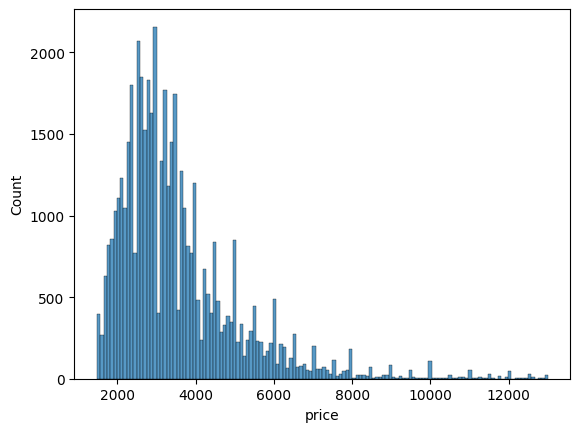

In [97]:
sns.histplot(y_train)

### The target has a heavy tail. To force it usually using a log convertation

<Axes: xlabel='price', ylabel='Count'>

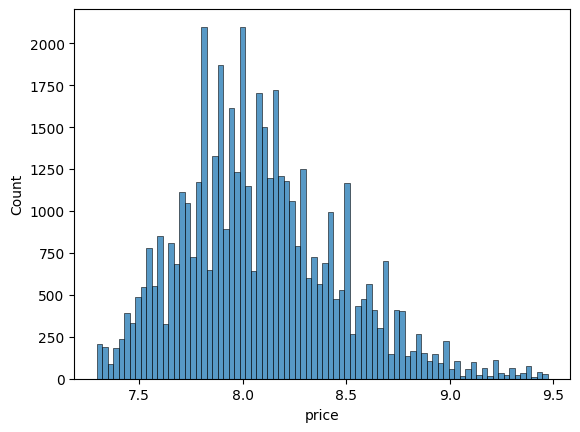

In [98]:
sns.histplot(np.log1p(y_train))

### Now its look like a normal distribution

In [101]:
y_train_log = np.log1p(y_train)

model_log = LinearRegressionAnalytical() 
model_log.fit(X_train_scaled_standard, y_train_log)

y_pred_log = model_log.predict(X_test_scaled_standard)

y_pred_final = np.expm1(y_pred_log)

In [102]:
    train_mae = MAE(y_test, y_pred_final)
    train_rmse = rmse(y_test, y_pred_final)
    train_r2 = R2_score(y_test, y_pred_final)
print(train_mae, train_rmse, train_r2)

691.9440726222232 1016.4341196853372 0.5754645348998384


# Target encoding (trying to get r2 >= 0.61)

Many boolean features have a small correlation with a target one by one.  

I want agregate some of this and look, how change correlations between new_features and price

I choose for agregate most "price-corr feature" - Elevator, Doorman, FitnessCenter, LaundryinUnit, RoofDeck, Dishwasher

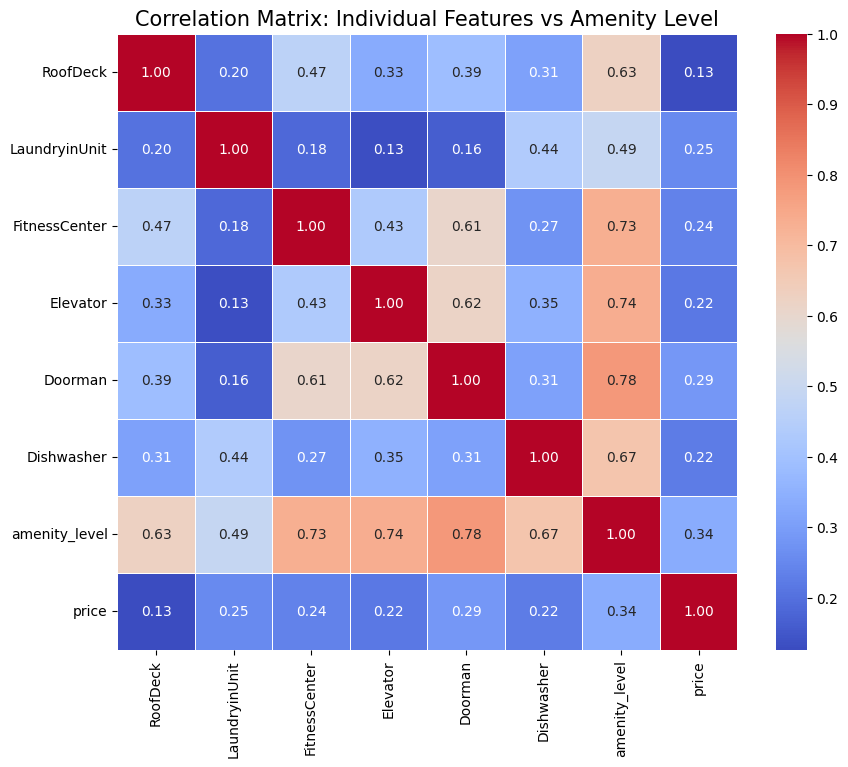

In [103]:
X_tr, X_te = X_train.copy(), X_test.copy()

amenities = ['Elevator', 'Doorman', 'FitnessCenter', 'LaundryinUnit', 'RoofDeck', 'Dishwasher']
X_tr['amenity_level'] = X_tr[amenities].sum(axis=1)
X_te['amenity_level'] = X_te[amenities].sum(axis=1)

temp_df = X_tr.copy()
temp_df['price'] = y_train

cols_to_show = ['RoofDeck', 'LaundryinUnit', 'FitnessCenter', 'Elevator', 'Doorman', 'Dishwasher','amenity_level', 'price']

corr_matrix = temp_df[cols_to_show].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Individual Features vs Amenity Level', fontsize=15)
plt.show()

New feature has more correlations with target, then boolean variables

After that I want create new feature - group of params: bedrooms, bathrooms and "feature for elite class" and look.
Это позволит группировать признаки по удобстав. После этого можно будет рассчитать среднюю цену для каждой группы и занести это значение в отдельную колонку.

Для демонстрации результата обучения я использую аналитическое решение, но, из-за сильно скоррелированных признаков, добавлю коэффициент регуляризации ```lambda``` в  формулу 

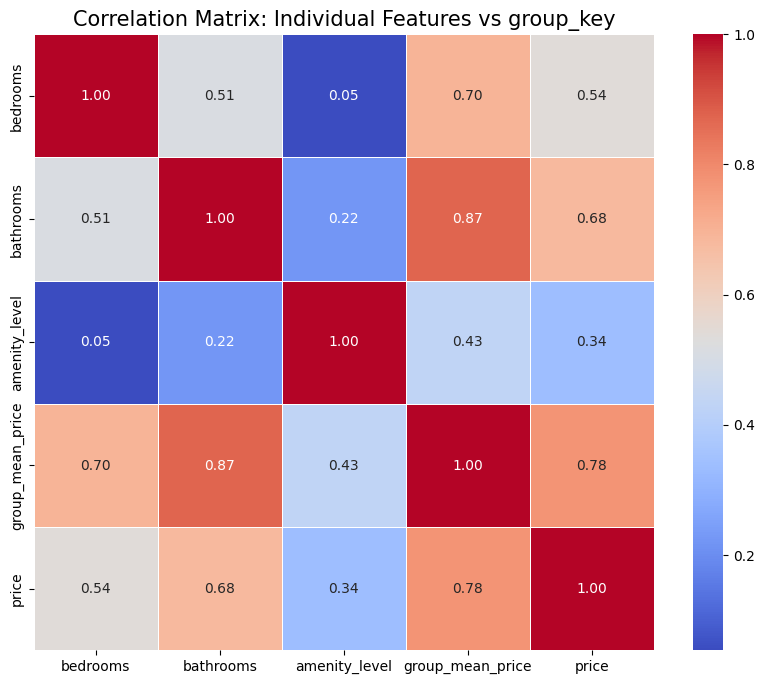

In [104]:

X_tr['group_key'] = X_tr['bedrooms'].astype(str) + "_" + X_tr['bathrooms'].astype(str) + "_" + X_tr['amenity_level'].astype(str)
X_te['group_key'] = X_te['bedrooms'].astype(str) + "_" + X_te['bathrooms'].astype(str) + "_" + X_te['amenity_level'].astype(str)

group_means = y_train.groupby(X_tr['group_key']).mean()

X_tr['group_mean_price'] = X_tr['group_key'].map(group_means)
X_te['group_mean_price'] = X_te['group_key'].map(group_means)

# и затем перенесу эти же группы в тест
X_te['group_mean_price'] = X_te['group_mean_price'].fillna(y_train.mean())

# после чего удалю ненужные признаки
X_tr = X_tr.drop(columns=['group_key'])
X_te = X_te.drop(columns=['group_key'])


temp_df = X_tr.copy()
temp_df['price'] = y_train

cols_to_show = ['bedrooms', 'bathrooms', 'amenity_level', 'group_mean_price', 'price']

corr_matrix = temp_df[cols_to_show].corr()



plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Individual Features vs group_key', fontsize=15)
plt.show()

In [105]:
X_tr = standard_custom.fit_transform(X_tr)
X_te = standard_custom.transform(X_te)

In [106]:
model = LinearRegressionAnalytical(lmbd = 0.5)
model.fit(X_tr, y_train)
y_pred = model.predict(X_te)
print(f"R2 with Linear with ridge coef: {R2_score(y_test, y_pred)}")

model = RidgeRegressionGradientDescent(lmbd = 0.01, epochs = 10000)
model.fit(X_tr, y_train)
y_pred = model.predict(X_te)
print(f"R2 with Ridge Regression: {R2_score(y_test, y_pred)}")

R2 with Linear with ridge coef: 0.6125805324480165
R2 with Ridge Regression: 0.6130848838764116


In [107]:
X_tr, X_te = X_train.copy(), X_test.copy()
y_tr_log = np.log1p(y_train)

amenities = ['Elevator', 'Doorman', 'FitnessCenter', 'LaundryinUnit', 'RoofDeck']
X_tr['amenity_level'] = X_tr[amenities].sum(axis=1)
X_te['amenity_level'] = X_te[amenities].sum(axis=1)

X_tr['group_key'] = X_tr['bedrooms'].astype(str) + "_" + X_tr['bathrooms'].astype(str) + "_" + X_tr['amenity_level'].astype(str)
X_te['group_key'] = X_te['bedrooms'].astype(str) + "_" + X_te['bathrooms'].astype(str) + "_" + X_te['amenity_level'].astype(str)

m = 1 
global_mean = y_tr_log.mean()

agg = y_tr_log.groupby(X_tr['group_key']).agg(['mean', 'count'])
counts = agg['count']
means = agg['mean']

smooth_means = (counts * means + m * global_mean) / (counts + m)

X_tr['group_mean_log'] = X_tr['group_key'].map(smooth_means)
X_te['group_mean_log'] = X_te['group_key'].map(smooth_means)

X_te['group_mean_log'] = X_te['group_mean_log'].fillna(global_mean)

X_tr = X_tr.drop(columns=['group_key'])
X_te = X_te.drop(columns=['group_key'])

model = LinearRegressionAnalytical(lmbd = 0.5)
model.fit(X_tr, y_tr_log)
y_pred_log  = model.predict(X_te)
y_pred_final = np.expm1(y_pred_log) * 1.0313
print(f"R2 with Linear with ridge coef: {R2_score(y_test, y_pred_final)}")

R2 with Linear with ridge coef: 0.6119294863120144
